# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# cloudiness = []
# country = []
# date = []
# humidity = []
# lat = []
# lng = []
# max_temp = []
# wind_speed = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
import json
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = "903d26752b488fa48ca6f1f79c75b184"
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

#define parameters
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 1

for city in cities:
    print(f"{count}: {city}")

    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        count = count +1
    except:
        pass

1: labuan
2: mindyak
3: belushya guba
3: ushuaia
4: wajir
5: marcona
5: chapais
6: katsuura
7: heyang
8: cape town
9: luderitz
10: iskateley
11: avarua
12: mataura
13: mitsamiouli
14: tiksi
15: chokurdakh
16: hobart
17: airai
18: yulara
19: vaitupu
19: barentsburg
19: saint george
20: atuona
21: pontianak
22: punta arenas
23: malakal
23: alofi
24: nishihara
25: bambous virieux
26: gravatai
27: carnarvon
28: jamestown
29: port alfred
30: rikitea
31: shimoda
32: taoudenni
33: taolanaro
33: nizhneyansk
33: richards bay
34: narsaq
35: arraial do cabo
36: busselton
37: mount pleasant
38: hilo
39: bredasdorp
40: saskylakh
41: georgetown
42: souillac
43: cururupu
44: gnjilane
44: tsihombe
44: pringsewu
45: bluff
46: chauk
47: simpang
48: axim
49: petauke
50: barrow
51: ponta do sol
52: rapina
53: tawkar
53: east london
54: saint-philippe
55: albany
56: yellowknife
57: lavrentiya
58: lebu
59: necochea
60: novyy urengoy
61: illoqqortoormiut
61: chumikan
62: qaanaaq
63: caravelas
64: soloneshnoy

528: nikolayevsk-na-amure
529: oum hadjer
530: pemberton
531: calvinia
532: dhing
533: sherbakul
534: kismayo
534: praia
535: sakaraha
536: marshfield
537: sidi bu zayd
537: talaya
538: san andres
539: santarem
539: mosetse
540: fort nelson
541: rungata
541: champerico
542: grand-santi
543: zheleznodorozhnyy
544: plettenberg bay
545: maputo
546: vostok
547: xichang
548: taksimo
549: wladyslawowo
550: saint-augustin
551: sept-iles


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#output_data_file

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [10]:
#create dictionary 
weather_dict = {
    "City": cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
#create and print dataframe
weather_data = pd.DataFrame.from_dict(weather_dict, orient= 'index')
weather_data_clean = weather_data.transpose().dropna()
weather_data_clean

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,labuan,75,BN,1553992200,83,5.28,115.24,29,1.96
1,mindyak,90,RU,1553992200,83,54.02,58.79,0,5
2,belushya guba,40,AR,1553990400,76,-54.81,-68.31,10,2.6
3,ushuaia,48,KE,1553994881,42,1.75,40.07,27.13,4.81
4,wajir,90,CA,1553992860,92,49.78,-74.86,-5,2.6
5,marcona,40,JP,1553994262,40,33.93,134.5,12,10.3
6,chapais,92,CN,1553994882,100,26.1,107.47,8.48,2.91
7,katsuura,75,ZA,1553994489,77,-33.93,18.42,18.33,5.1
8,heyang,0,NA,1553994812,85,-26.65,15.16,17.98,5.76
9,cape town,36,RU,1553994883,83,67.68,53.15,-4.13,6.61


In [11]:
#output data to .csv
weather_data.transpose().to_csv(output_data_file, sep='\t', encoding='utf-8')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

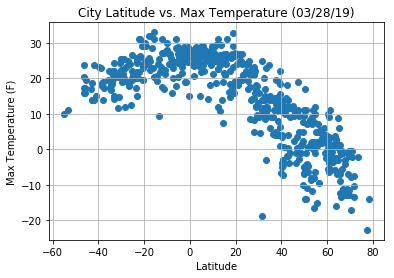

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data_clean['Lat'], weather_data_clean['Max Temp'], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03/28/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_maxtemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

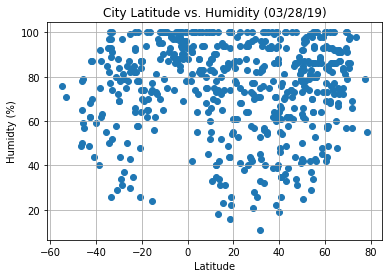

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data_clean["Lat"], weather_data_clean["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (03/28/19)")
plt.ylabel("Humidty (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

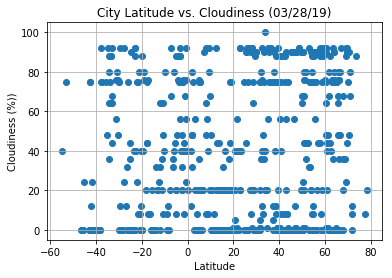

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data_clean["Lat"], weather_data_clean["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03/28/19)")
plt.ylabel("Cloudiness (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

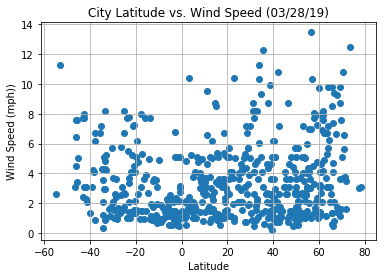

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data_clean["Lat"], weather_data_clean["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03/28/19)")
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_windspeed.png")

# Show plot
plt.show()